# Eigenmodes

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from post_processing import eigen as eigproc
from spectral import basis
from scipy import special as specfun

def filter_sort_eig(eigvals, eigfuns):
    # Filter the slow-decaying modes (these are usually the non-spurious ones)
    idx_filtered = np.abs(np.imag(eigvals)) > 0.5*np.abs(np.real(eigvals))
    eigvals = eigvals[idx_filtered]
    eigfuns = eigfuns[:, idx_filtered]
    # Sort by real part, and then by imaginary part
    idx_sorted = sorted(list(range(eigvals.size)), key=lambda i: (-np.real(eigvals[i]), np.abs(np.imag(eigvals[i]))))
    eigvals = eigvals[idx_sorted]
    eigfuns = eigfuns[:, idx_sorted]
    return eigvals, eigfuns

## Plot eigenmodes - FEM

In [66]:
with h5py.File("./output/eigenmodes_Pm0_n50_full.h5", 'r') as f:
    xcoord = f["nodes"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

eigvals, eigfuns = eigproc.filter_sort_eig(eigvals, eigfuns)

In [67]:
eigvals[:50]

array([-0.0168149 -0.68674455j, -0.0168149 +0.68674455j,
       -0.07770794+0.83301073j, -0.07770794-0.83301073j,
       -0.15049224-1.03721565j, -0.15049224+1.03721565j,
       -0.2299879 +1.2749351j , -0.2299879 -1.2749351j ,
       -0.31424034+1.53317572j, -0.31424034-1.53317572j,
       -0.40321538+1.80450702j, -0.40321538-1.80450702j,
       -0.49786051-2.08452083j, -0.49786051+2.08452083j,
       -0.60054287-2.37072641j, -0.60054287+2.37072641j,
       -0.71869858+2.66379362j, -0.71869858-2.66379362j,
       -0.86066918+3.02454211j, -0.86066918-3.02454211j,
       -0.90675831-3.36802353j, -0.90675831+3.36802353j,
       -0.96783898+3.69026586j, -0.96783898-3.69026586j,
       -0.97213156-2.88614705j, -0.97213156+2.88614705j,
       -1.03339282-4.01577562j, -1.03339282+4.01577562j,
       -1.10144781-4.34931315j, -1.10144781+4.34931315j,
       -1.17205975-4.69240124j, -1.17205975+4.69240124j,
       -1.24559919-5.04544539j, -1.24559919+5.04544539j,
       -1.32242374-5.40852442j,

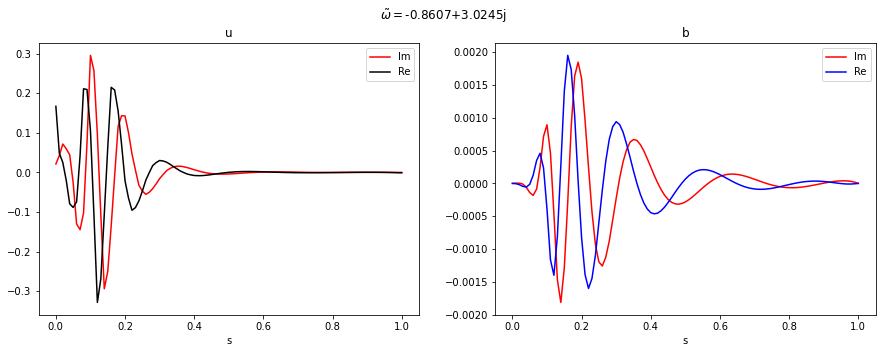

In [68]:
idx = 18

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xcoord, np.imag(eigfuns[0::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[0::2, idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xcoord, np.imag(eigfuns[1::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[1::2, idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

## Plot eigenmodes - Spectral

In [76]:
import scipy.special as specfun
from spectral import basis

with h5py.File("./output/eigenmodes_1D/eigenmodes_Pm1e-5_noslip/eigenmodes_Pm1e-5_noslip_cheby500_redvec.h5", 'r') as f:
    degrees = f["degrees"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

eigvals, eigfuns = filter_sort_eig(eigvals, eigfuns)

In [77]:
eigvals[:50]

array([-0.01679326-0.68673052j, -0.01679326+0.68673052j,
       -0.07752334-0.83286602j, -0.07752334+0.83286602j,
       -0.14996016+1.03676296j, -0.14996016-1.03676296j,
       -0.22894611-1.2739847j , -0.22894611+1.2739847j ,
       -0.31257155-1.53162398j, -0.31257155+1.53162398j,
       -0.40071886+1.80247797j, -0.40071886-1.80247797j,
       -0.49381434+2.08244804j, -0.49381434-2.08244804j,
       -0.59244659-2.36912813j, -0.59244659+2.36912813j,
       -0.69721876-2.661161j  , -0.69721876+2.661161j  ,
       -0.8085958 -2.95790117j, -0.8085958 +2.95790117j,
       -0.9267721 -3.25912752j, -0.9267721 +3.25912752j,
       -1.05165404-3.56476685j, -1.05165404+3.56476685j,
       -1.18296092-3.87470739j, -1.18296092+3.87470739j,
       -1.32035562+4.18873919j, -1.32035562-4.18873919j,
       -1.46353152-4.50657586j, -1.46353152+4.50657586j,
       -1.61224359-4.82789694j, -1.61224359+4.82789694j,
       -1.76630622-5.15238381j, -1.76630622+5.15238381j,
       -1.9255878 -5.47973747j,

In [ ]:
xi = np.linspace(-1, 1, num=100)
cheby_eval = basis.ChebyshevTSpace(np.arange(50), xi)
eigenmodes_u = np.array([cheby_eval(eigfuns[:50, i]) for i in range(74)])
eigenmodes_b = np.array([cheby_eval(eigfuns[50:, i]) for i in range(74)])

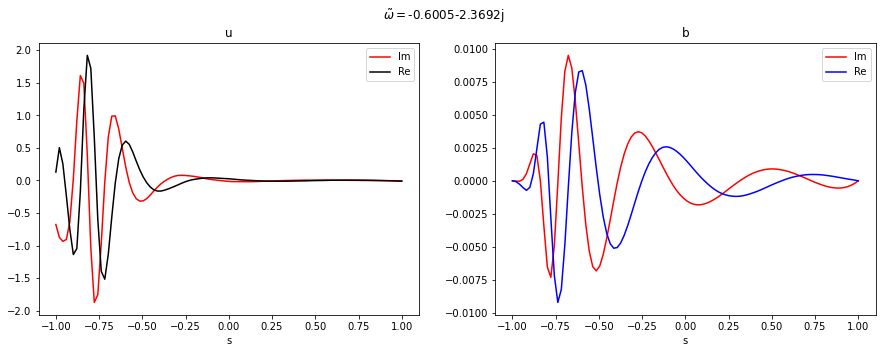

In [11]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xi, np.imag(eigenmodes_u[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_u[idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xi, np.imag(eigenmodes_b[idx]), 'r-', label="Im")
ax.plot(xi, np.real(eigenmodes_b[idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

### Spectrum plot

Coefficient squared, without the kernel

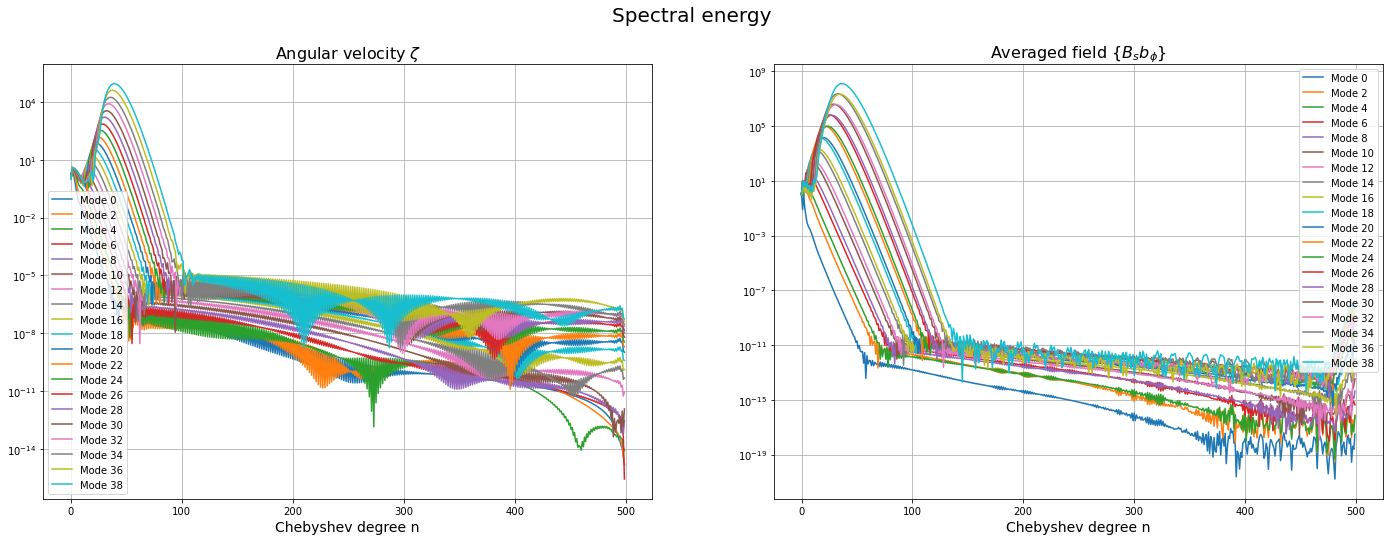

In [80]:
save_pict = True

cheby_deg = 500
u_coeffs = eigfuns[:cheby_deg, :]
b_coeffs = eigfuns[cheby_deg:, :]

# Convert to modulus squared
u_coeffs = np.abs(u_coeffs)**2
b_coeffs = np.abs(b_coeffs)**2

# Normalize by leading Tn coefficient
u_coeffs = u_coeffs/np.abs(u_coeffs[0, :])
b_coeffs = b_coeffs/np.abs(b_coeffs[0, :])

# Normalize by maximum coefficient
# u_coeffs = u_coeffs/np.max(np.abs(u_coeffs), axis=0)
# b_coeffs = b_coeffs/np.max(np.abs(b_coeffs), axis=0)

n_modes = 20

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

ax = axes[0]
lines = ax.semilogy(np.abs(u_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Angular velocity $\zeta$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)

ax = axes[1]
lines = ax.semilogy(np.abs(b_coeffs[:, :2*n_modes:2]))
ax.legend(lines, ("Mode {}".format(2*i) for i in range(2*n_modes)))
ax.grid(which="both")
ax.set_title(r"Averaged field $\{B_s b_\phi\}$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)

fig.suptitle("Spectral energy", fontsize=20)
if save_pict:
    plt.savefig("./output/eigenmodes_1D/eigenmodes_Pm1e-5_noslip/energy_spec500.png", format="png", dpi=150, bbox_inches="tight")
plt.show()

### Energy kernel

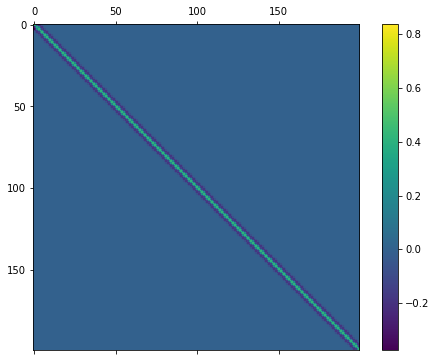

In [31]:
xi = np.linspace(-1, 1, num=200)
cheby_eval = basis.ChebyshevTSpace(np.arange(cheby_deg), xi)
ker = cheby_eval.kernel(lambda x: np.pi/2**4*(1 + x)**3*np.sqrt(3 + x), int_degree=6, jacobi_idx=(+1/2, 0))

fig, ax = plt.subplots(figsize=(8, 6))
cm = ax.matshow(ker)
# cm = ax.matshow(np.ma.array(ker, mask=np.abs(ker) < 1e-7))
plt.colorbar(cm)
plt.savefig("./output/eigenmodes_Pm0_cheby200_quadpt/energy_kernel.png", format='png', dpi=150, bbox_inches="tight")
plt.show()

## Eigenmode tracking

### Spectral

In [53]:
from post_processing import eigen as eigen_post

idx_track_spec, eigenval_track_spec = eigen_post.track_eigenvalues(["./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby50.h5", 
                                                                    "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby100.h5", 
                                                                    "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby200.h5", 
                                                                    "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby500.h5", 
                                                                    "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby1000.h5"], k=50, reverse_track=True)

cheby_deg = np.array([50, 100, 200, 500, 1000])
total_dof = 2*cheby_deg

C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:46: UserWarning: Non-monotonic eigenvalue difference - potential non-convergence
  warnings.warn("Non-monotonic eigenvalue difference - potential non-convergence")
C:\Users\gentle\Documents\Projects\pycrete\post_processing\eigen.py:44: UserWarning: Large discrepancies
  warnings.warn("Large discrepancies")


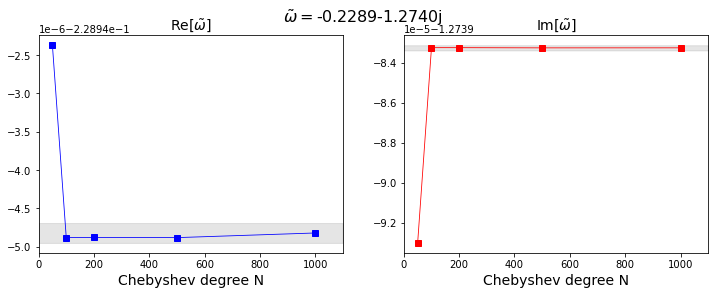

In [54]:
eig_idx = 6
single_prec_err = np.abs(eigenval_track_spec[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axes[0]
ax.plot(cheby_deg, np.real(eigenval_track_spec[eig_idx]), 's-b', linewidth=0.8)
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Chebyshev degree N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.real(eigenval_track_spec[eig_idx][-1]) - single_prec_err, np.real(eigenval_track_spec[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.real(eigenval_track_spec[eig_idx]).max() - np.real(eigenval_track_spec[eig_idx]).min()
# ax.set_ylim([np.real(eigenval_track_spec[eig_idx]).min() - 0.05*yrange, np.real(eigenval_track_spec[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

ax = axes[1]
ax.plot(cheby_deg, np.imag(eigenval_track_spec[eig_idx]), 's-r', linewidth=0.8)
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Chebyshev degree N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.imag(eigenval_track_spec[eig_idx][-1]) - single_prec_err, np.imag(eigenval_track_spec[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.imag(eigenval_track_spec[eig_idx]).max() - np.imag(eigenval_track_spec[eig_idx]).min()
# ax.set_ylim([np.imag(eigenval_track_spec[eig_idx]).min() - 0.05*yrange, np.imag(eigenval_track_spec[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(eigenval_track_spec[eig_idx][-1]), fontsize=16)
plt.show()

### Finite-Element

In [55]:
idx_track_fem, eigenval_track_fem = eigen_post.track_eigenvalues(["./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_n50_full.h5", 
                                                                  "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_n100_full.h5", 
                                                                  "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_n200_full.h5", 
                                                                  "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_n500_full.h5"], k=50, reverse_track=True)

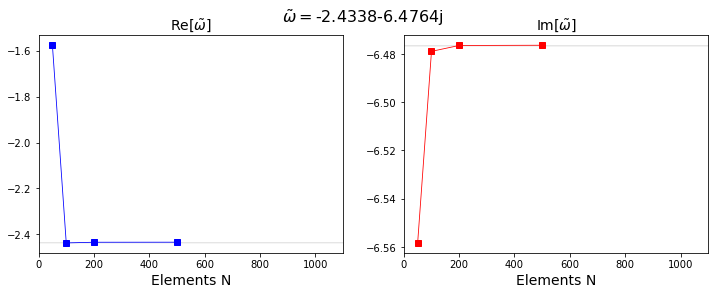

In [56]:
n_elem = np.array([50, 100, 200, 500])
total_dof_fem = 4*n_elem

eig_idx = 40
single_prec_err = np.abs(eigenval_track_fem[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axes[0]
ax.plot(n_elem, np.real(eigenval_track_fem[eig_idx]), 's-b', linewidth=0.8)
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Elements N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.real(eigenval_track_fem[eig_idx][-1]) - single_prec_err, np.real(eigenval_track_fem[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.real(eigenval_track_fem[eig_idx]).max() - np.real(eigenval_track_fem[eig_idx]).min()
ax.set_ylim([np.real(eigenval_track_fem[eig_idx]).min() - 0.05*yrange, np.real(eigenval_track_fem[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

ax = axes[1]
ax.plot(n_elem, np.imag(eigenval_track_fem[eig_idx]), 's-r', linewidth=0.8)
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("Elements N", fontsize=14)
ax.fill_between(np.arange(0, 1100), np.imag(eigenval_track_fem[eig_idx][-1]) - single_prec_err, np.imag(eigenval_track_fem[eig_idx][-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = np.imag(eigenval_track_fem[eig_idx]).max() - np.imag(eigenval_track_fem[eig_idx]).min()
ax.set_ylim([np.imag(eigenval_track_fem[eig_idx]).min() - 0.05*yrange, np.imag(eigenval_track_fem[eig_idx]).max() + 0.05*yrange])
ax.set_xlim([0, 1100])

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(eigenval_track_fem[eig_idx][-1]), fontsize=16)
plt.show()

### Convergence comparison

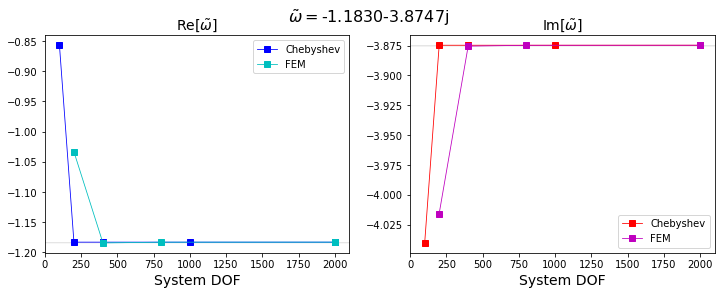

In [63]:
eig_idx = 24
save_pict = False
save_name = "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/Convergence_mode12"

total_dof_fem = 4*n_elem

single_prec_err = np.abs(eigenval_track_fem[eig_idx][-1])*1e-7

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

spec_vals = eigenval_track_spec[eig_idx]
if np.allclose(spec_vals[-1], eigenval_track_fem[eig_idx][-1], rtol=1e-2):
    fem_vals = eigenval_track_fem[eig_idx]
elif np.allclose(np.conj(spec_vals[-1]), eigenval_track_fem[eig_idx][-1], rtol=1e-2):
    fem_vals = np.conj(eigenval_track_fem[eig_idx])
else:
    print("The two eigenmodes seem to be different, searching the closest mode instead")
    eig_idx_fem = np.argmin(np.abs(eigenval_track_fem[:, -1] - spec_vals[-1]))
    fem_vals = eigenval_track_fem[eig_idx_fem]
    print("Use {:d}-th eigenvalue of FEM; finest FEM solution = {:.4f}".format(eig_idx_fem, fem_vals[-1]))

ax = axes[0]
ax.plot(total_dof, np.real(spec_vals), 's-b', linewidth=0.8, label="Chebyshev")
ax.plot(total_dof_fem, np.real(fem_vals), 's-c', linewidth=0.8, label="FEM")
ax.set_title(r"Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("System DOF", fontsize=14)
ax.fill_between(np.arange(0, 2100), np.real(spec_vals[-1]) - single_prec_err, np.real(spec_vals[-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = [min([np.real(spec_vals).min(), np.real(fem_vals).min()]), 
          max([np.real(spec_vals).max(), np.real(fem_vals).max()])]
ax.set_xlim([0, 2100])
ax.set_ylim([yrange[0] - 0.05*(yrange[1] - yrange[0]), yrange[1] + 0.05*(yrange[1] - yrange[0])])
ax.legend()

ax = axes[1]
ax.plot(total_dof, np.imag(spec_vals), 's-r', linewidth=0.8, label="Chebyshev")
ax.plot(total_dof_fem, np.imag(fem_vals), 's-m', linewidth=0.8, label="FEM")
ax.set_title(r"Im[$\tilde{\omega}$]", fontsize=14)
ax.set_xlabel("System DOF", fontsize=14)
ax.fill_between(np.arange(0, 2100), np.imag(spec_vals[-1]) - single_prec_err, np.imag(spec_vals[-1]) + single_prec_err, color="grey", alpha=0.2)
yrange = [min([np.imag(spec_vals).min(), np.imag(fem_vals).min()]), 
          max([np.imag(spec_vals).max(), np.imag(fem_vals).max()])]
ax.set_xlim([0, 2100])
ax.set_ylim([yrange[0] - 0.05*(yrange[1] - yrange[0]), yrange[1] + 0.05*(yrange[1] - yrange[0])])
ax.legend()

fig.suptitle(r"$\tilde{\omega} = $" + "{:.4f}".format(spec_vals[-1]), fontsize=16)
if save_pict:
    plt.savefig(save_name + ".png", format="png", dpi=150, bbox_inches="tight")
plt.show()

## Compare eigenmodes

In [179]:
eigen_file_list = [
    "./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby500_redvec.h5",
    "./output/eigenmodes_1D/eigenmodes_Pm1e-5_noslip/eigenmodes_Pm1e-5_noslip_cheby500_redvec.h5",
    "./output/eigenmodes_1D/eigenmodes_Pm1e-3_noslip/eigenmodes_Pm1e-3_noslip_cheby500_redvec.h5",
    "./output/eigenmodes_1D/eigenmodes_Pm1e-2_noslip/eigenmodes_Pm1e-2_noslip_cheby500_redvec.h5",
    "./output/eigenmodes_1D/eigenmodes_Pm1e-1_noslip/eigenmodes_Pm1e-1_noslip_cheby500_redvec.h5",
    "./output/eigenmodes_1D/eigenmodes_Pm1e+0_noslip/eigenmodes_Pm1e+0_noslip_cheby500_redvec.h5",
    "./output/eigenmodes_1D/eigenmodes_Pm1e+1_noslip/eigenmodes_Pm1e+1_noslip_cheby500_redvec.h5"
]

eigenval_list = list()

for fname in eigen_file_list:
    with h5py.File(fname, 'r') as f:
        eigenval_temp = f["eigenvals"][()]
    eigenval_temp = eigproc.filter_sort_eig(eigenval_temp)
    eigenval_list.append(eigenval_temp)

for i in range(10):
    print(' '.join(["{:.5e}".format(eigenval_temp[i]) for eigenval_temp in eigenval_list]))
    # print(' '.join(["{:.5e}".format(-np.abs(np.imag(eigenval_temp[i]))/np.real(eigenval_temp[i])/2) for eigenval_temp in eigenval_list]))

-1.67928e-02+6.86730e-01j -1.67933e-02-6.86731e-01j -1.68306e-02+6.86748e-01j -1.71070e-02-6.86881e-01j -1.94614e-02-6.88209e-01j -3.97965e-02+6.97935e-01j -1.94411e-01-7.32299e-01j
-1.67928e-02-6.86730e-01j -1.67933e-02+6.86731e-01j -1.68306e-02-6.86748e-01j -1.71070e-02+6.86881e-01j -1.94614e-02+6.88209e-01j -3.97965e-02-6.97935e-01j -1.94411e-01+7.32299e-01j
-7.75226e-02+8.32865e-01j -7.75233e-02-8.32866e-01j -7.75945e-02+8.32933e-01j -7.81330e-02+8.33500e-01j -8.29003e-02-8.39235e-01j -1.31009e-01-8.84565e-01j -3.74597e-01-3.29378e-01j
-7.75226e-02-8.32865e-01j -7.75233e-02+8.32866e-01j -7.75945e-02-8.32933e-01j -7.81330e-02-8.33500e-01j -8.29003e-02+8.39235e-01j -1.31009e-01+8.84565e-01j -3.74597e-01+3.29378e-01j
-1.49959e-01-1.03676e+00j -1.49960e-01+1.03676e+00j -1.50060e-01+1.03686e+00j -1.50795e-01-1.03764e+00j -1.57082e-01-1.04584e+00j -2.32087e-01-1.12338e+00j -4.53000e-01-1.04669e+00j
-1.49959e-01+1.03676e+00j -1.49960e-01-1.03676e+00j -1.50060e-01-1.03686e+00j -1.50795e-01

## Role of viscosity

### Eigenvalue spectrum

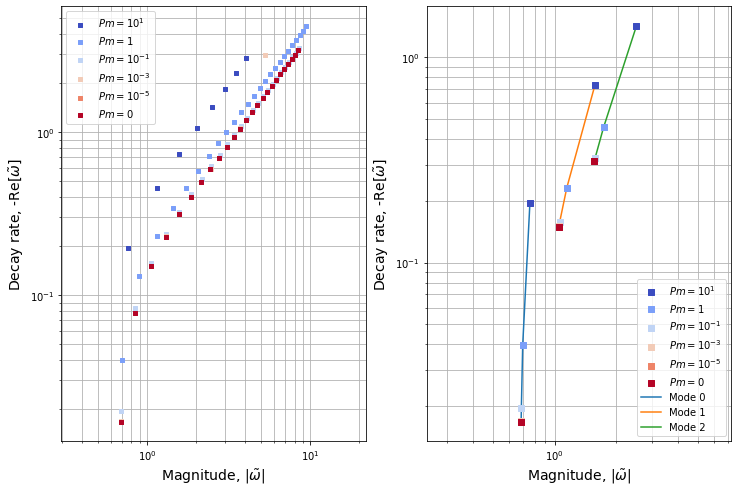

In [134]:
save_pict = True
save_name = "./output/eigenmodes_1D/eigenvalues"

eigen_f_list = ["./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-5_noslip/eigenmodes_Pm1e-5_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-3_noslip/eigenmodes_Pm1e-3_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-1_noslip/eigenmodes_Pm1e-1_noslip_cheby500_redvec.h5",
                "./output/eigenmodes_1D/eigenmodes_Pm1e+0_noslip/eigenmodes_Pm1e+0_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e+1_noslip/eigenmodes_Pm1e+1_noslip_cheby500_redvec.h5"]
eigen_colors = plt.cm.coolwarm_r(np.arange(len(eigen_f_list))/(len(eigen_f_list) - 1))
eigen_labels = [r"$Pm=0$", r"$Pm=10^{-5}$", r"$Pm=10^{-3}$", r"$Pm=10^{-1}$", r"$Pm=1$", r"$Pm=10^{1}$"]
track_modes = [0, 2, 4]
mode_labels = [0, 1, 2]
track_vals = np.zeros((len(track_modes), len(eigen_f_list)), dtype=np.complex128)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

for i_f in range(len(eigen_f_list)-1, -1, -1):
    with h5py.File(eigen_f_list[i_f], 'r') as f_read:
        eigenvals = f_read["eigenvals"][()]
    eigenvals = eigproc.filter_sort_eig(eigenvals, threshold=1.)[:50:2]
    ax = axes[0]
    ax.scatter(np.abs(eigenvals), -np.real(eigenvals), 20, marker="s", color=eigen_colors[i_f], label=eigen_labels[i_f], zorder=5)
    ax = axes[1]
    ax.scatter(np.abs(eigenvals[track_modes]), -np.real(eigenvals[track_modes]), 40, marker="s", color=eigen_colors[i_f], label=eigen_labels[i_f], zorder=5)
    track_vals[:, i_f] = eigenvals[track_modes]

for i_mode in range(len(track_modes)):
    ax.plot(np.abs(track_vals[i_mode]), -np.real(track_vals[i_mode]), label="Mode {:d}".format(mode_labels[i_mode]), zorder=2)

ax = axes[0]
ax.set_xlabel(r"Magnitude, $|\tilde{\omega}|$", fontsize=14)
ax.set_ylabel(r"Decay rate, -Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=10)
ax.axis("equal")
ax.grid(which="both")

ax = axes[1]
ax.set_xlabel(r"Magnitude, $|\tilde{\omega}|$", fontsize=14)
ax.set_ylabel(r"Decay rate, -Re[$\tilde{\omega}$]", fontsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=10, loc=4)
ax.axis("equal")
ax.grid(which="both", zorder=0)

if save_pict:
    plt.savefig(save_name + ".png", format="png", dpi=150, bbox_inches="tight")

plt.show()

### Multiple modes

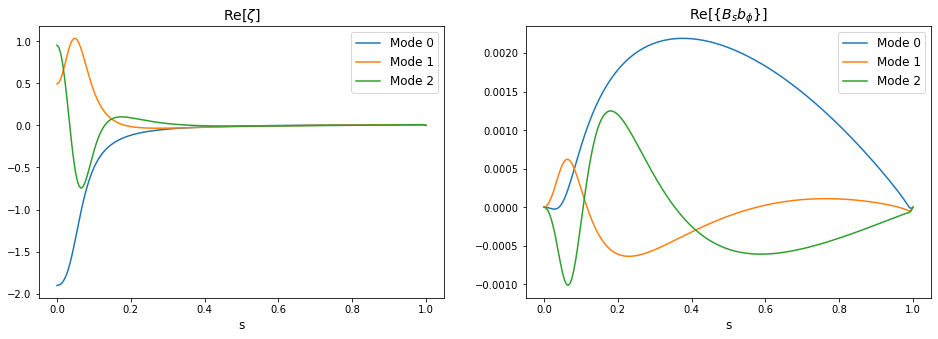

In [192]:
mode_id_list = [0, 2, 4]
deg = 500
save_pict = True
save_name = "./output/eigenmodes_1D/eigenmodes_Pm1e-1_noslip/mode_0-4"

eigen_fname = "./output/eigenmodes_1D/eigenmodes_Pm1e-1_noslip/eigenmodes_Pm1e-1_noslip_cheby500_redvec.h5"
mode_labels = ["Mode {:d}".format(m_id // 2) for m_id in mode_id_list]
mode_colors = plt.cm.coolwarm(np.arange(len(mode_id_list))/(len(mode_id_list) - 1))

xi = np.linspace(-1, 1, num=200)
s_array = (1 + xi)/2
cheby_eval = basis.ChebyshevTSpace(np.arange(deg), xi)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

with h5py.File(eigen_fname, 'r') as f_read:
    eigenvals = f_read["eigenvals"][()]
    eigenfuns = f_read["eigenfuns"][()]
eigenvals, eigenfuns = eigproc.filter_sort_eig(eigenvals, eigenfuns, threshold=1.)
# eigenmode_u = np.array([cheby_eval(eigenfuns[:deg, id_mode]/eigenfuns[np.argmax(np.abs(eigenfuns[:deg, id_mode])), id_mode]) for id_mode in mode_id_list])
# eigenmode_b = np.array([cheby_eval(eigenfuns[deg:, id_mode]/eigenfuns[np.argmax(np.abs(eigenfuns[:deg, id_mode])), id_mode]) for id_mode in mode_id_list])
eigenmode_u = np.array([cheby_eval(eigenfuns[:deg, id_mode]) for id_mode in mode_id_list])
eigenmode_b = np.array([cheby_eval(eigenfuns[deg:, id_mode]) for id_mode in mode_id_list])

for id_mode in range(len(mode_id_list)):
    ax = axes[0]
    ax.plot(s_array, np.real(eigenmode_u[id_mode]), label=mode_labels[id_mode], zorder=5)
    ax = axes[1]
    ax.plot(s_array, np.real(eigenmode_b[id_mode]), label=mode_labels[id_mode], zorder=5)

ax = axes[0]
ax.set_title(r"Re[$\zeta$]", fontsize=14)
ax.set_xlabel("s", fontsize=12)
ax.legend(fontsize=12)

ax = axes[1]
ax.set_title(r"Re[$\{B_s b_\phi\}$]", fontsize=14)
ax.set_xlabel("s", fontsize=12)
ax.legend(fontsize=12)

if save_pict:
    plt.savefig(save_name + ".png", format="png", dpi=150, bbox_inches="tight")
plt.show()

### Fundamental mode

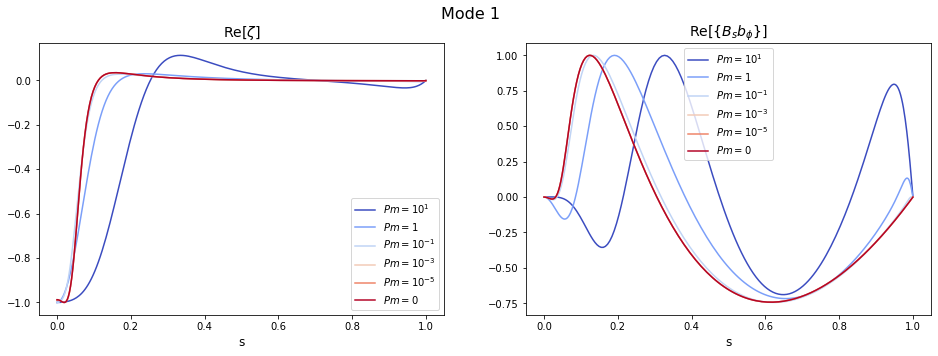

In [216]:
mode_id = 2
deg = 500
save_pict = True
save_name = "./output/eigenmodes_1D/mode_shape_%d" % (mode_id // 2,)

eigen_f_list = ["./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-5_noslip/eigenmodes_Pm1e-5_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-3_noslip/eigenmodes_Pm1e-3_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-1_noslip/eigenmodes_Pm1e-1_noslip_cheby500_redvec.h5",
                "./output/eigenmodes_1D/eigenmodes_Pm1e+0_noslip/eigenmodes_Pm1e+0_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e+1_noslip/eigenmodes_Pm1e+1_noslip_cheby500_redvec.h5"]
eigen_colors = plt.cm.coolwarm_r(np.arange(len(eigen_f_list))/(len(eigen_f_list) - 1))
eigen_labels = [r"$Pm=0$", r"$Pm=10^{-5}$", r"$Pm=10^{-3}$", r"$Pm=10^{-1}$", r"$Pm=1$", r"$Pm=10^{1}$"]

xi, _ = specfun.roots_chebyt(200)
s_array = (1 + xi)/2
cheby_eval = basis.ChebyshevTSpace(np.arange(deg), xi)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for i_f in range(len(eigen_f_list)-1, -1, -1):
    with h5py.File(eigen_f_list[i_f], 'r') as f_read:
        eigenvals = f_read["eigenvals"][()]
        eigenfuns = f_read["eigenfuns"][()]
    eigenvals, eigenfuns = eigproc.filter_sort_eig(eigenvals, eigenfuns, threshold=1.)
    eigenmode_u = cheby_eval(eigenfuns[:deg, mode_id]/eigenfuns[np.argmax(np.abs(eigenfuns[:, mode_id])), mode_id])
    # eigenmode_b = cheby_eval(eigenfuns[deg:, mode_id]/eigenfuns[deg, mode_id])
    eigenmode_b = cheby_eval(eigenfuns[deg:, mode_id]/eigenfuns[np.argmax(np.abs(eigenfuns[:, mode_id])), mode_id])
    # eigenmode_u = cheby_eval(eigenfuns[:deg, mode_id])
    # eigenmode_b = cheby_eval(eigenfuns[deg:, mode_id])
    ax = axes[0]
    ax.plot(s_array, np.real(eigenmode_u)/np.amax(np.abs(np.real(eigenmode_u))), color=eigen_colors[i_f], label=eigen_labels[i_f], linewidth=1.5, zorder=5)
    ax = axes[1]
    ax.plot(s_array, np.real(eigenmode_b)/np.amax(np.abs(np.real(eigenmode_b))), color=eigen_colors[i_f], label=eigen_labels[i_f], linewidth=1.5, zorder=5)

ax = axes[0]
ax.set_title(r"Re[$\zeta$]", fontsize=14)
ax.set_xlabel("s", fontsize=12)
ax.legend(fontsize=10)

ax = axes[1]
ax.set_title(r"Re[$\{B_s b_\phi\}$]", fontsize=14)
ax.set_xlabel("s", fontsize=12)
ax.legend(fontsize=10)

fig.suptitle("Mode %d" % (mode_id // 2,), fontsize=16)

if save_pict:
    plt.savefig(save_name + ".png", format="png", dpi=150, bbox_inches="tight")
plt.show()

### Spectral content

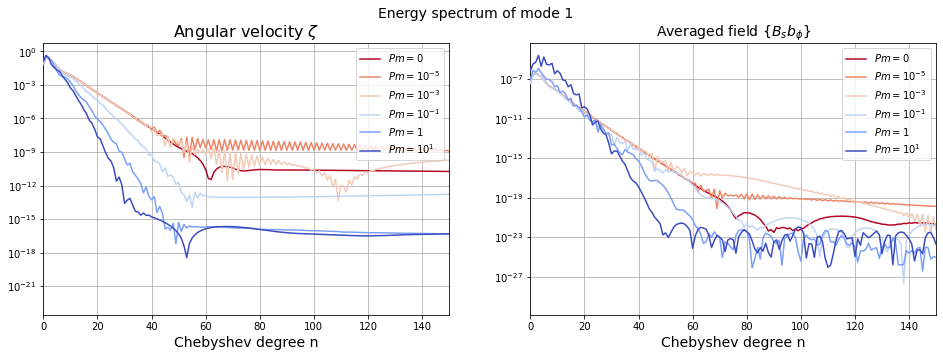

In [215]:
mode_id = 2
deg = 500
save_pict = True
save_name = "./output/eigenmodes_1D/mode_spectrum_%d" % (mode_id // 2)

eigen_f_list = ["./output/eigenmodes_1D/eigenmodes_Pm0_freeslip/eigenmodes_Pm0_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-5_noslip/eigenmodes_Pm1e-5_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-3_noslip/eigenmodes_Pm1e-3_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e-1_noslip/eigenmodes_Pm1e-1_noslip_cheby500_redvec.h5",
                "./output/eigenmodes_1D/eigenmodes_Pm1e+0_noslip/eigenmodes_Pm1e+0_noslip_cheby500_redvec.h5", 
                "./output/eigenmodes_1D/eigenmodes_Pm1e+1_noslip/eigenmodes_Pm1e+1_noslip_cheby500_redvec.h5"]
eigen_colors = plt.cm.coolwarm_r(np.arange(len(eigen_f_list))/(len(eigen_f_list) - 1))
eigen_labels = [r"$Pm=0$", r"$Pm=10^{-5}$", r"$Pm=10^{-3}$", r"$Pm=10^{-1}$", r"$Pm=1$", r"$Pm=10^{1}$"]

xi, _ = specfun.roots_chebyt(200)
s_array = (1 + xi)/2
cheby_eval = basis.ChebyshevTSpace(np.arange(deg), xi)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for i_f in range(len(eigen_f_list)):
    with h5py.File(eigen_f_list[i_f], 'r') as f_read:
        eigenvals = f_read["eigenvals"][()]
        eigenfuns = f_read["eigenfuns"][()]
    eigenvals, eigenfuns = eigproc.filter_sort_eig(eigenvals, eigenfuns, threshold=1.)
    u_coeffs = eigenfuns[:deg, mode_id]
    b_coeffs = eigenfuns[deg:, mode_id]
    ax = axes[0]
    ax.semilogy(np.abs(u_coeffs)**2, color=eigen_colors[i_f], label=eigen_labels[i_f], linewidth=1.5, zorder=5)
    ax = axes[1]
    ax.semilogy(np.abs(b_coeffs)**2, color=eigen_colors[i_f], label=eigen_labels[i_f], linewidth=1.5, zorder=5)

ax = axes[0]
ax.legend(fontsize=10, loc=1)
ax.grid(which="both")
ax.set_title(r"Angular velocity $\zeta$", fontsize=16)
ax.set_xlabel("Chebyshev degree n", fontsize=14)
ax.set_xlim([0, 150])

ax = axes[1]
ax.legend(fontsize=10, loc=1)
ax.grid(which="both")
ax.set_title(r"Averaged field $\{B_s b_\phi\}$", fontsize=14)
ax.set_xlabel("Chebyshev degree n", fontsize=14)
ax.set_xlim([0, 150])

fig.suptitle("Energy spectrum of mode %d" % (mode_id // 2,), fontsize=14)

if save_pict:
    plt.savefig(save_name + ".png", format="png", dpi=150, bbox_inches="tight")
plt.show()

## Numerical integration

### Matrices calculated via different methods

In [72]:
K_vec = np.load("./output/K_mat_vectorized.npy")
M_vec = np.load("./output/M_mat_vectorized.npy")
# K_vec = np.load("./output/K_mat_sequential_v3.npy")
# M_vec = np.load("./output/M_mat_sequential_v3.npy")
# K_seq = np.load("./output/K_mat_sequential.npy")
# M_seq = np.load("./output/M_mat_sequential.npy")
K_seq = np.load("./output/K_mat_vectorized_v3.npy")
M_seq = np.load("./output/M_mat_vectorized_v3.npy")

(array([1.1322e+04, 3.9900e+02, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.4000e+01, 1.9980e+03, 4.2470e+03, 5.1800e+02]),
 array([-16.25560868, -15.35174842, -14.44788817, -13.54402791,
        -12.64016766, -11.7363074 , -10.83244715,  -9.92858689,
         -9.02472664,  -8.12086638,  -7.21700613,  -6.31314588,
         -5.40928562,  -4.50542537,  -3.60156511,  -2.69770486]),
 <BarContainer object of 15 artists>)

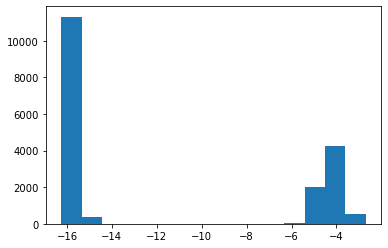

In [73]:
K_diff = K_seq - K_vec
plt.hist(np.log10(np.abs(K_diff[np.abs(K_diff) > 1e-14])/(np.abs(K_seq) + np.abs(K_vec))[np.abs(K_diff) > 1e-14]), bins=15)

C:\Users\gentle\AppData\Local\Temp\ipykernel_15624\1922669051.py:4: RuntimeWarning: divide by zero encountered in log10
  cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)), mask=np.abs(K_diff) < 1e-15))
C:\Users\gentle\AppData\Local\Temp\ipykernel_15624\1922669051.py:9: RuntimeWarning: invalid value encountered in true_divide
  cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)/(np.abs(K_seq) + np.abs(K_vec))), mask=np.abs(K_diff) < 1e-15))
C:\Users\gentle\AppData\Local\Temp\ipykernel_15624\1922669051.py:9: RuntimeWarning: divide by zero encountered in log10
  cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)/(np.abs(K_seq) + np.abs(K_vec))), mask=np.abs(K_diff) < 1e-15))


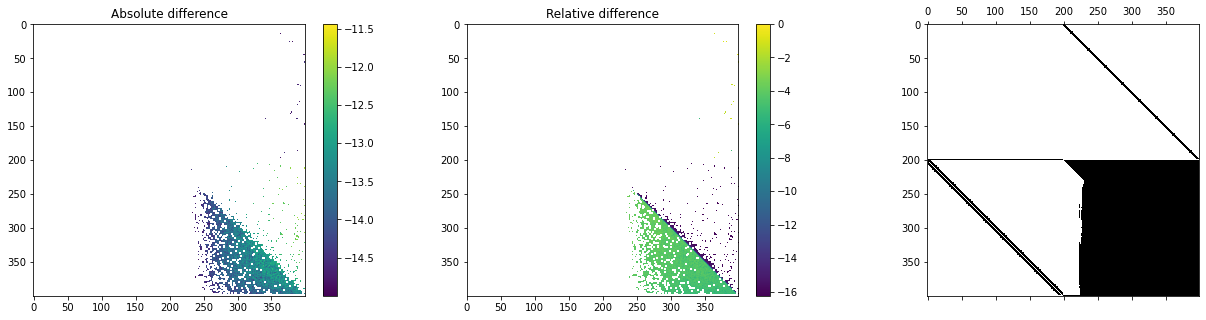

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

ax = axes[0]
cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)), mask=np.abs(K_diff) < 1e-15))
plt.colorbar(cm, ax=ax)
ax.set_title("Absolute difference")

ax = axes[1]
cm = ax.imshow(np.ma.array(np.log10(np.abs(K_diff)/(np.abs(K_seq) + np.abs(K_vec))), mask=np.abs(K_diff) < 1e-15))
plt.colorbar(cm, ax=ax)
ax.set_title("Relative difference")

ax = axes[2]
ax.spy(K_vec, precision=1e-12)

plt.show()

(array([  323.,  7900., 32408., 33681.,  2465.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  1561.,   799.]),
 array([-19.56694972, -18.26948041, -16.9720111 , -15.6745418 ,
        -14.37707249, -13.07960318, -11.78213388, -10.48466457,
         -9.18719527,  -7.88972596,  -6.59225665,  -5.29478735,
         -3.99731804,  -2.69984873,  -1.40237943,  -0.10491012]),
 <BarContainer object of 15 artists>)

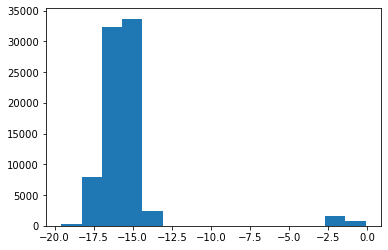

In [75]:
M_diff = M_seq - M_vec
# plt.hist(np.log10(np.abs(M_diff[np.abs(M_diff) > 1e-14])/(np.abs(M_seq) + np.abs(M_vec))[np.abs(M_diff) > 1e-15]), bins=15)
plt.hist(np.log10(np.abs(M_seq[np.abs(M_seq) > 0])), bins=15)

C:\Users\gentle\AppData\Local\Temp\ipykernel_15624\2221288359.py:4: RuntimeWarning: divide by zero encountered in log10
  cm = ax.imshow(np.ma.array(np.log10(np.abs(M_diff)), mask=np.abs(M_vec) < 1e-16))
C:\Users\gentle\AppData\Local\Temp\ipykernel_15624\2221288359.py:9: RuntimeWarning: invalid value encountered in true_divide
  cm = ax.imshow(np.ma.array(np.log10(np.abs(M_diff)/(np.abs(M_seq) + np.abs(M_vec))), mask=np.abs(M_vec) < 1e-16))
C:\Users\gentle\AppData\Local\Temp\ipykernel_15624\2221288359.py:9: RuntimeWarning: divide by zero encountered in log10
  cm = ax.imshow(np.ma.array(np.log10(np.abs(M_diff)/(np.abs(M_seq) + np.abs(M_vec))), mask=np.abs(M_vec) < 1e-16))


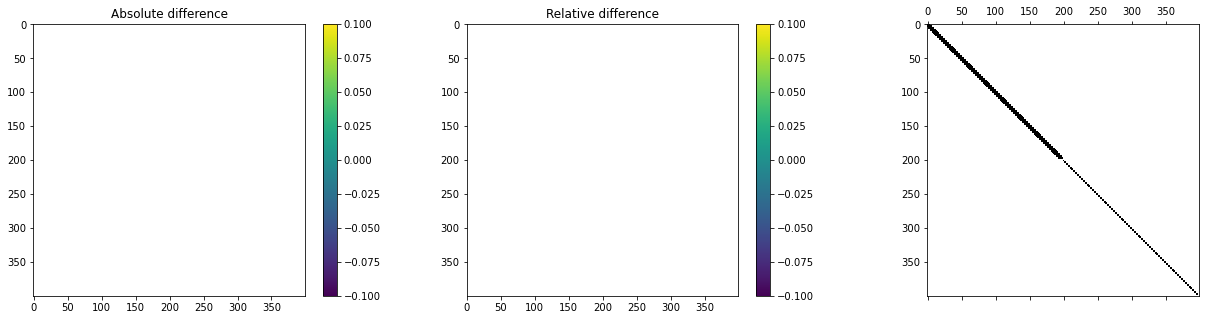

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

ax = axes[0]
cm = ax.imshow(np.ma.array(np.log10(np.abs(M_diff)), mask=np.abs(M_vec) < 1e-16))
plt.colorbar(cm, ax=ax)
ax.set_title("Absolute difference")

ax = axes[1]
cm = ax.imshow(np.ma.array(np.log10(np.abs(M_diff)/(np.abs(M_seq) + np.abs(M_vec))), mask=np.abs(M_vec) < 1e-16))
plt.colorbar(cm, ax=ax)
ax.set_title("Relative difference")

ax = axes[2]
ax.spy(M_vec, precision=1e-12)

plt.show()

In [22]:
xi_quad, wt_quad = specfun.roots_chebyt(500)
N_mesh, Xi_mesh = np.meshgrid(np.arange(500), xi_quad, indexing='ij')
Tn = specfun.eval_chebyt(N_mesh, Xi_mesh)
dTn_dxi = N_mesh*specfun.eval_chebyu(N_mesh - 1, Xi_mesh)
dTn_dxi2 = N_mesh*((N_mesh + 1)*specfun.eval_chebyt(N_mesh, Xi_mesh) - specfun.eval_chebyu(N_mesh, Xi_mesh))/(Xi_mesh**2 - 1)

In [52]:
np.sum(wt_quad*Tn[400, :]*dTn_dxi2[300, :]), np.sum(wt_quad*Tn[49, :]*dTn_dxi[38, :])

(0.0001372108247323922, 3.1118441157218513e-12)